# Homework 5 (100 Points)

For this homework we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [1]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

### Exercise 1: Data pre-processing (16 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`, and print the first five rows [2pt]

In [2]:
df = pd.read_csv("./citibike.csv")

b) Check that there are no missing values in your dataset. If they are, take care of them appropriately [2pt]


In [3]:
df.isnull().sum()

trips                  0
precipitation          0
snow_depth             0
snowfall               0
max_temperature        0
min_temperature        0
average_wind_speed     3
year                   0
season                 0
month                  0
holiday                0
stations_in_service    0
weekday                0
weekday_non_holiday    0
dtype: int64

In [4]:
df['average_wind_speed']= df['average_wind_speed'].fillna(df['average_wind_speed'].mean())

In [5]:
df.isnull().sum()

trips                  0
precipitation          0
snow_depth             0
snowfall               0
max_temperature        0
min_temperature        0
average_wind_speed     0
year                   0
season                 0
month                  0
holiday                0
stations_in_service    0
weekday                0
weekday_non_holiday    0
dtype: int64

c) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays [4pt]

In [6]:
df['weekday']

0       True
1       True
2      False
3      False
4       True
       ...  
847     True
848     True
849    False
850    False
851     True
Name: weekday, Length: 852, dtype: bool

In [7]:
df_weekday=pd.DataFrame(df.loc[(df['weekday']==True )&(df['weekday_non_holiday']==True )])
df_weekend=pd.DataFrame(
    df.loc[(df['weekday']==False )|(df['weekday_non_holiday']==False)|df['holiday']==True])



In [8]:
df_weekday.shape

(585, 14)

In [9]:
df_weekend.shape

(267, 14)

d) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [8pts]

From Left to Right: FullDF, WeekdayDF, WeekendDF


<AxesSubplot:title={'center':'trips'}, xlabel='[season]'>

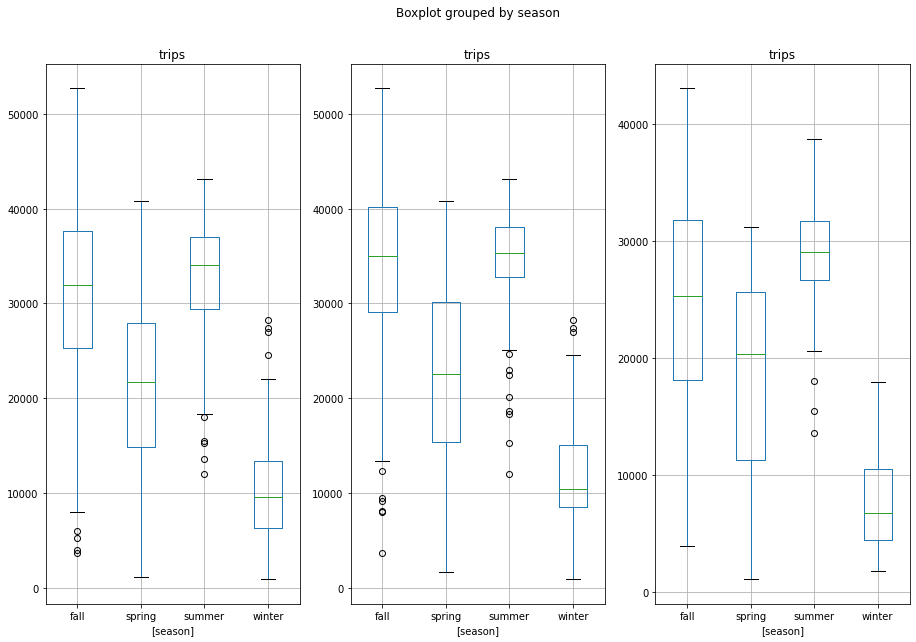

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
print("From Left to Right: FullDF, WeekdayDF, WeekendDF")
df.boxplot(column=['trips'], by=['season'], ax=axes[0])
df_weekday.boxplot(column=['trips'], by=['season'], ax=axes[1])
df_weekend.boxplot(column=['trips'], by=['season'], ax=axes[2])


    looking at the distribution of ridership overall, the most popular seasons are fall and summer, which makes sense due to the fact that generally the most days with bike-friendly weather occur during those seasons. Spring may have less warm days and more rainy days, leading to decreased ridership. Of course, winter will have the lowest ridership, since the weather is the least bike friendly during that season, although there are some outliers, perhaps during warm streaks without snow during the winter, or days where other means of transportation were not available (ex. subway line closing down). 

    Across the board, the ridership of citibikes appears to be fairly consistent regardless of weekend or weekday staus. The differences between seasons on the whole is much more apparent. However, there are some differences that can be spotted between weekday and weekend ridership. On the whole, weekday ridership is always higher than weekend ridership, regardless of season. During the Weekend, ridership varies more and covers a broader range, whereas the weekday grouping is much tighter on the whole, despite having a few more outliers. Otherwise, the biggest difference between weekday and weekend ridership grouped by season is the riderhship in the winter is much more noticeably lower, which makes sense since it is the season where it is the least pleasant to ride a bike through the city, so most people will opt for alternate means of transportaion on weekends where they have more time, but perhaps on weekdays they have less options and must make it to work at a certain time and despite being uncomfortable, the bikes are the most reliable and convenient means of getting to their destination. 

## Exercise 2: Qualitative predictors (18 pts)

The Season variable is an example of what’s called a categorical predictor. This problem gets to fit a model with a qualitative predictor and to interpret the findings.

a) Fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. Use your weekdays dataset [4pt]


In [11]:
import statsmodels.formula.api as smf

In [12]:
mod = smf.ols(formula='trips ~ season', data=df_weekday)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     275.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          3.07e-111
Time:                        14:34:01   Log-Likelihood:                -6069.1
No. Observations:                 585   AIC:                         1.215e+04
Df Residuals:                     581   BIC:                         1.216e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.439e+04    570.310  

b) How many total coefficients are there in the model? What does each coefficient correspond to? [4pt]

There are 4 coefficients- Intercept, and one for each season minus fall. The coefficients indicate the effect each season has on ridership (number of trips taken)

Intercept refers to the result that the model would ouput if the variables were all set to zero (it is the B in the y=mx+B linear formula)

The rest of the coefficients are the calculated by the model separating the the dataset by season and analyzes each season separately relative to Fall, which is why it is not listed. in this case the coefficients calculated by the model refer to the M in the y=Mx+b equation. Negative coefficients indicate inverse relationships. The coefficients refer to the relationship that the season has to ridership compared to ridership in the fall. 

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [4pt]

As previously mentioned, negative coefficients mean an inverse relationship. In this case that means that during the spring, ridership decreases moderately relative to ridership in the fall because it's coefficient is a small negative number. Likewise, the large negative coefficient for winter indicates that bike ridership decreases the most during the winter season relative to the Fall, which is confirmed by the boxplots displayed in part one. The Summer coefficient is a large positive number, indicating that bike ridership increases the most during the summer season relative to the Fall. 

d) Repeat a) -> c) with your weekends dataset. What difference can you see? [6pt]

In [13]:
mod = smf.ols(formula='trips ~ season', data=df_weekend)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     105.1
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           9.86e-45
Time:                        14:34:08   Log-Likelihood:                -2746.1
No. Observations:                 267   AIC:                             5500.
Df Residuals:                     263   BIC:                             5515.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.474e+04    765.698  

The number of coefficients here is the same as the previous table of results, but the numbers are different. The coefficients still map to the different seasons of the year. The significance of the coefficients being positive and negative is the same as before as well. Here the Spring and Winter coefficients are much smaller than the ones in part A, but this is probably due to the fact that there is significantly less data for the weekends, so the numbers are of a lesser magnitude. The summer coefficient is actually much larger here, indicating that summer weekends had a greater increase in ridership compared to fall weekends compared to the difference in ridership in those seasons on weekdays. Because of the smaller amount of data, the standard error is generally larger, lending to worse T scores. the only exception here being summer which yields a much higher t score in the weekend dataset than on the weekday dataset, probably because relatively more people ride bikes on summer weekends than on weekends during other seasons, so there is just more data for summer weekends than for other seasons. 

## Exercise 3: Multiple linear regression (16 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [4pt]


In [14]:
# use weekdays
mod = smf.ols(formula='trips ~ snow_depth+snowfall+min_temperature+max_temperature+precipitation+month ', data=df_weekday)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     371.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.28e-194
Time:                        14:34:14   Log-Likelihood:                -5865.9
No. Observations:                 585   AIC:                         1.175e+04
Df Residuals:                     578   BIC:                         1.178e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4574.9552   1158.924     

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [4pt]

- Snow_depth -> as snow depth increases, meaning there is more snow on the ground on that day, the less people will take trips on citibikes. 


- Snowfall -> the more snow has accumulated on the ground in the last 24 hours, the more bike ridership decreases


- Min_temperature -> as the minimum temperature recorded for that day gets lower, bike ridership decreases, but not as significantly as it did for the previous two weather factors


- Max_temperature -> as the maximum temperatrue recorded for that day gets higher, bike ridership increases pretty significantly


- Precipitation -> the rainier it is that day (more rainfall), the less people ride bikes. Precipitation appears to be the variable that has the greatest impact on bike ridership overall


- Month -> As the months (by number) get higher, ridership increases. this makes sense because less people will ride bikes in the early months of the year where there is more snow and rainfall, but towards the middle and later parts of the year during summer and fall, many more people will ride bikes. 

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [4pt]

In [15]:
mod = smf.ols(formula='trips ~ average_wind_speed+snow_depth+snowfall+min_temperature+max_temperature+precipitation+month ', data=df_weekday)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     324.1
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          2.96e-195
Time:                        14:34:18   Log-Likelihood:                -5861.3
No. Observations:                 585   AIC:                         1.174e+04
Df Residuals:                     577   BIC:                         1.177e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -976.6726   1661

I added average wind speed as my additonal predictor, since wind resistance is the greatest hinderance to bike speed, making bike riding less efficient and less pleasant, so people would avoid riding bikes on days where the average wind speed is high. Indeed, the coefficient indicates that there is a strong negative correlation between average wind speed and number of trips taken. The R-square metric for goodness of fit improved, but only marginally (.794 vs .797)

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

- The predictors associated with increased ridership are:
    - Max temperature
    - Month
    - Snowfall (only according to the coefficient in the previous question, see description below)
 
- The predictors associated with decreased ridership are:
    - Average wind speed
    - Precipitation
    - Snow depth
    - Min temperature
    - Snowfall- despite the positive coefficient in C, we know that more snow on the ground means decreased riderhip. In this case we see an positive coefficient because there are strongly correlated coefficients being used as predictors of number of trips taken and it is making the regression less accurate. 


e) Which predictors are statistically significant (95% confidence level)? [2pt]

In [16]:
res.conf_int(alpha=0.05)

,0,1
Intercept,-4239.501640,2286.156455
average_wind_speed,-622.465055,-130.270410
snow_depth,-514.870321,-155.269248
snowfall,-528.985812,536.761044
min_temperature,-108.825825,93.637812
max_temperature,326.581560,515.803250
precipitation,-9297.017635,-6872.487311
month,579.608195,891.152968


The above is a a chart that shows the confidence interval for each predictor at the 95% confidence level. looking at the output from part C though, we can look at the T values to determine which predictors are statistically significant, which means they have a T Value of over approximately 1.9 since our model uses 577 degrees of freedom. The only two predictors that fit thesee criteria are Max temperature, and Month.

## Exercise 4: Dealing with collinearity (12 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. [2pt]


In [17]:
df_corr = pd.DataFrame(df_weekday.corr())

In [18]:
df_corr

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,month,holiday,stations_in_service,weekday,weekday_non_holiday
trips,1.000000,-0.283221,-0.519099,-0.306855,0.817587,0.799857,-0.559463,0.067921,0.487036,NaN,0.437526,NaN,NaN
precipitation,-0.283221,1.000000,0.025934,0.237101,-0.017448,0.009101,0.158186,-0.011527,-0.000732,NaN,-0.004308,NaN,NaN
snow_depth,-0.519099,0.025934,1.000000,0.270281,-0.483199,-0.497756,0.251989,0.134701,-0.443224,NaN,-0.119089,NaN,NaN
snowfall,-0.306855,0.237101,0.270281,1.000000,-0.241738,-0.246453,0.256832,0.037251,-0.220809,NaN,-0.057271,NaN,NaN
max_temperature,0.817587,-0.017448,-0.483199,-0.241738,1.000000,0.967992,-0.563407,0.031883,0.343408,NaN,0.125109,NaN,NaN
min_temperature,0.799857,0.009101,-0.497756,-0.246453,0.967992,1.000000,-0.552891,0.014703,0.395190,NaN,0.127725,NaN,NaN
average_wind_speed,-0.559463,0.158186,0.251989,0.256832,-0.563407,-0.552891,1.000000,0.058934,-0.264339,NaN,-0.096604,NaN,NaN
year,0.067921,-0.011527,0.134701,0.037251,0.031883,0.014703,0.058934,1.000000,-0.369025,NaN,0.389123,NaN,NaN
month,0.487036,-0.000732,-0.443224,-0.220809,0.343408,0.395190,-0.264339,-0.369025,1.000000,NaN,0.320966,NaN,NaN
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above dataframe shows the correlation between all of the variables. All cells that contain a value between 0.7 and 0.9 and -0.7 and -0.9 can be considered to be highly correlated.

- Max_temperature and Trips = 0.817587
- Min_temperature and Trips = .799857
- Min_temperature and Max_temperature = .967992


b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

Min and max temperature are the most highly correlated, which makes sense since if the min temp of a day is very low, it makes sense it will not be a day with a high max temp, and a day with a high max temp will not have a very low min temp. Since it cannot be extremely hot and extremely cold, it makes sense that there would be a clear and strong correlation between thest two predictors. 

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [4pt]

In [19]:
mod = smf.ols(formula='trips ~ average_wind_speed+snow_depth+snowfall+max_temperature+precipitation+month ', data=df_weekday)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     378.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.47e-196
Time:                        14:35:38   Log-Likelihood:                -5861.3
No. Observations:                 585   AIC:                         1.174e+04
Df Residuals:                     578   BIC:                         1.177e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -906.9175   1591

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [4pt]

                        coef       std err       t        P>|t|     [0.025      0.975]
3A:
    max_temperature   440.6311     48.064      9.168      0.000     346.230     535.032

4C:
    max_temperature   414.4887     15.805     26.225      0.000     383.446     445.532

The coefficients between parts 3A and 4C are fairly different, as is shown in the table above. However, the standard deviation in part 4C is much smaller than the standard error in part 3A, resulting in a much higher T value for the 4C max temperature variable. This large difference in T value suggessts that the 4C max temperature variable is a much more statistically significant variable than the max temperature varaible in 3C, although that one is still statistically significant since it has a value of 9.168, but it is just less significant compared to the temperature variable in 4C

## Exercise 5: Exploring different models (38 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [4pts]

<AxesSubplot:xlabel='month', ylabel='trips'>

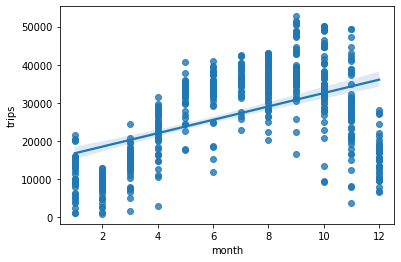

In [20]:
sns.regplot(x='month', y='trips', data = df_weekday)

The scatterplot above shows that while the trend is roughly linear for months zero through nine, the linar relationnship begins to fall apart durinng months ten through twelve, where weather gets colder again and ridership begins to decrease. The overall shape of the distribution resembelse more of a slight curve, perhaps some kind of quadrtic functionn would be better suited to fitting this relationship. 

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [8pts]

**NOTE: For each of these, I have plotted both the polynomial regression using sns regplot, which should be the same as plotting directly from the smf.ols regression results, but in case it is not, I have also plotted directly from the regression results. I kept the sns.regeplot graphs because I find they are nicer.**

In [21]:
# printing out the summary and displaying the graph for a linear (order 1) regression model
mod_x = smf.ols(formula='trips ~ month + I(month) ', data=df_weekday)
res_x = mod_x.fit()
print(res_x.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     181.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           3.56e-36
Time:                        14:35:46   Log-Likelihood:                -6248.8
No. Observations:                 585   AIC:                         1.250e+04
Df Residuals:                     583   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.502e+04   1002.699     14.979      0.0

<AxesSubplot:xlabel='month', ylabel='trips'>

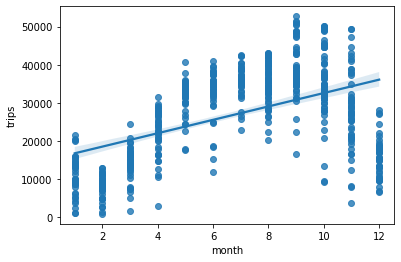

In [22]:
sns.regplot(x='month', y='trips', data = df_weekday, order =1)

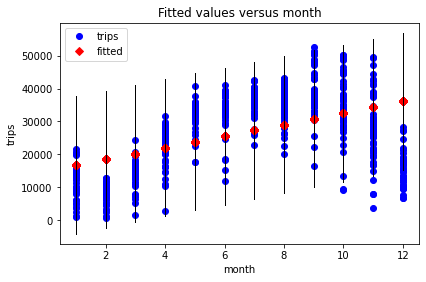

In [23]:
fig = sm.graphics.plot_fit(res_x, "month")
fig.tight_layout(pad=1.0)

In [24]:
# printing out the summary and displaying the graph for a quadratic (order 2) regression model
mod_x2 = smf.ols(formula='trips ~ month + I(month**2) ', data=df_weekday)
res_x2 = mod_x2.fit()
print(res_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     463.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          3.34e-121
Time:                        14:35:52   Log-Likelihood:                -6049.2
No. Observations:                 585   AIC:                         1.210e+04
Df Residuals:                     582   BIC:                         1.212e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7945.8611   1197.806     -6.634

<AxesSubplot:xlabel='month', ylabel='trips'>

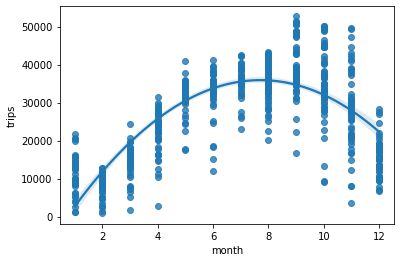

In [25]:
sns.regplot(x='month', y='trips', data = df_weekday, order =2)

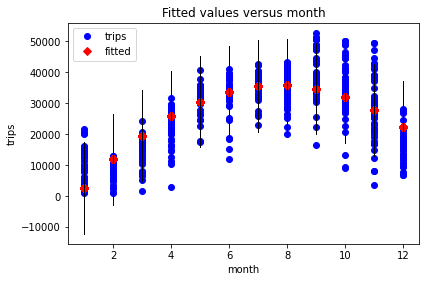

In [26]:
fig = sm.graphics.plot_fit(res_x2, "month")
fig.tight_layout(pad=1.0)

In [27]:
# printing out the summary and displaying the graph for a quadratic (order 2) regression model with lower degree 
# polynomials included 
mod_x2_s = smf.ols(formula='trips ~ month + I(month) + I(month**2) ', data=df_weekday)
res_x2_s = mod_x2_s.fit()
print(res_x2_s.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     463.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          3.34e-121
Time:                        14:35:59   Log-Likelihood:                -6049.2
No. Observations:                 585   AIC:                         1.210e+04
Df Residuals:                     582   BIC:                         1.212e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7945.8611   1197.806     -6.634

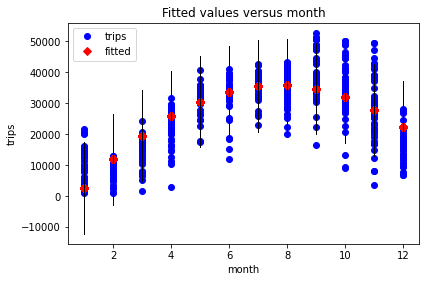

In [31]:
fig = sm.graphics.plot_fit(res_x2_s, "month")
fig.tight_layout(pad=1.0)

In [28]:
# printing out the summary and displaying the graph for a cubic (order 3) regression model
mod_x3 = smf.ols(formula='trips ~ month + I(month**3) ', data=df_weekday)
res_x3 = mod_x3.fit()
print(res_x3.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     559.2
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          3.23e-136
Time:                        14:36:05   Log-Likelihood:                -6014.5
No. Observations:                 585   AIC:                         1.203e+04
Df Residuals:                     582   BIC:                         1.205e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3324.6619    960.517     -3.461

<AxesSubplot:xlabel='month', ylabel='trips'>

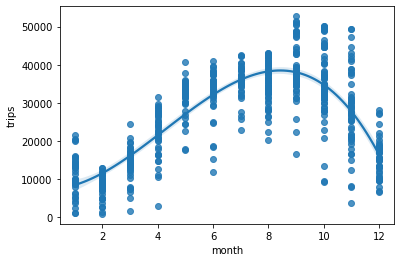

In [212]:
sns.regplot(x='month', y='trips', data = df_weekday, order =3)

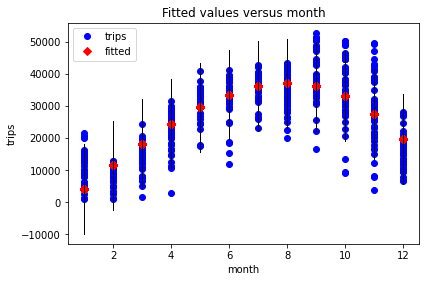

In [213]:
fig = sm.graphics.plot_fit(res_x3, "month")
fig.tight_layout(pad=1.0)

**NOTE: Below is the regression for x^3, but I added the lower degrees in the regression as well. I was told on piazza that this is not striclty necessary, but i did it anyways since it is technically the more correct answer. 

In [29]:
# printing out the summary and displaying the graph for a cubic (order 3) regression model with lower 
# degree polynomials included
mod_x3_plus = smf.ols(formula='trips ~ month + I(month**2)+I(month**3) ', data=df_weekday)
res_x3_plus = mod_x3_plus.fit()
print(res_x3_plus.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     427.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.60e-146
Time:                        14:36:44   Log-Likelihood:                -5987.2
No. Observations:                 585   AIC:                         1.198e+04
Df Residuals:                     581   BIC:                         1.200e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7455.2812   1700.786      4.383

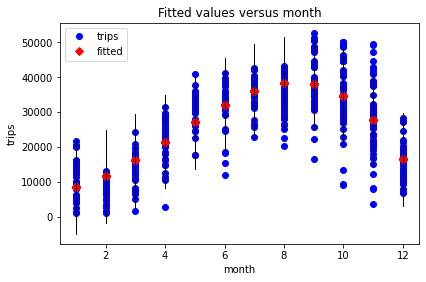

In [30]:
fig = sm.graphics.plot_fit(res_x3_plus, "month")
fig.tight_layout(pad=1.0)

Plot Order: 
Linear, R_squared:  0.23720406445820708
Quadratic, R_squared:  0.6145272467835537
Cubic, R_squared:  0.6577099399600643


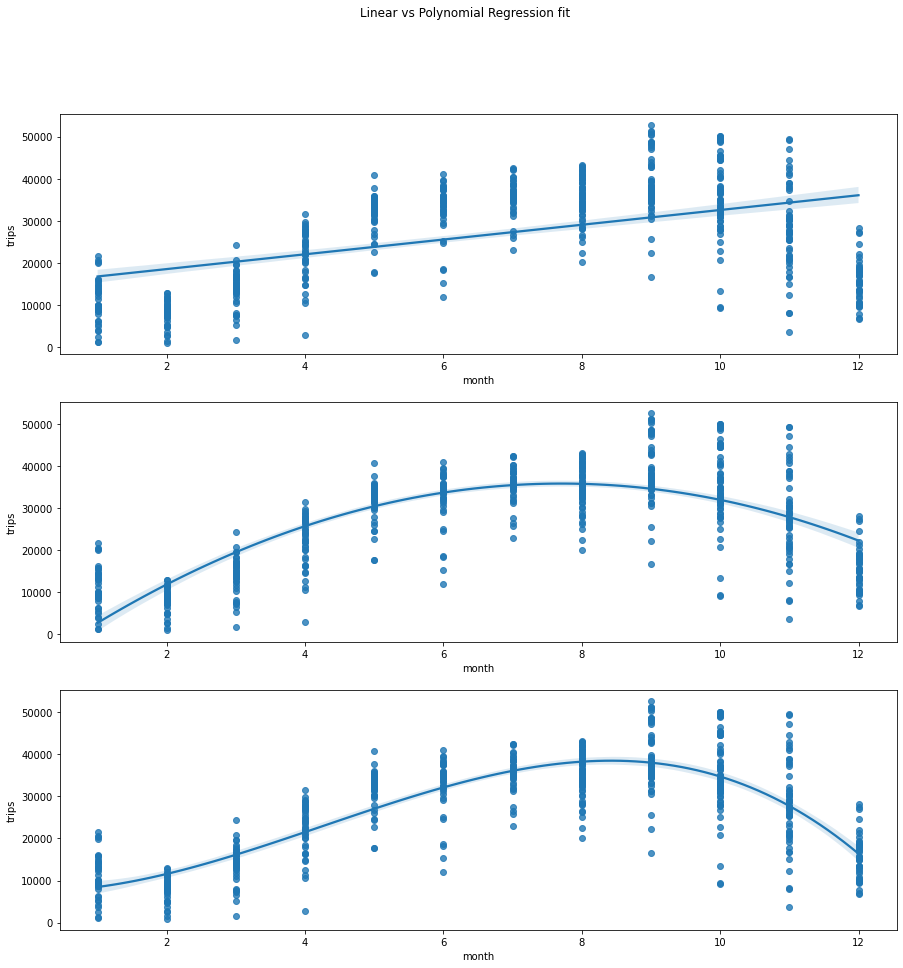

In [32]:
# creating sublot in order to display all of the graphs side by side so that differences
# can more easily be seen

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle("Linear vs Polynomial Regression fit")
sns.regplot(x='month', y='trips', data = df_weekday, order =1, ax=axes[0])
sns.regplot(x='month', y='trips', data = df_weekday, order =2, ax=axes[1])
sns.regplot(x='month', y='trips', data = df_weekday, order =3, ax=axes[2])

#obtaining the r-squared values for each regression model
resL = res_x.rsquared
resQ = res_x2.rsquared
resC = res_x3.rsquared
# printing out information about the sublots and the associated R-squared values
print("Plot Order: ")
print("Linear, R_squared: ", resL)
print("Quadratic, R_squared: ", resQ)
print("Cubic, R_squared: ", resC)



Visually, it appears that the cubic model fits the data best, and looking at the R-squared values, this is confirmed, since the cubic regression has the highest R-squared value of the three regressions. This means that the cubic regression is the best at explaining the variations in the response variable around its mean value. 

NOTE: I made both sns regeplot graphs and plotted directly from the regression, but I displayed the sns regplot results in the sublplot because the two graph results appear to be identical and the sns regplot results are visually much nicer.

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [16pts]


In [33]:
# fitting all the regressions with order 1, 2, and 3 for temperature
t_mod_x = smf.ols(formula='trips ~ max_temperature + I(month) ', data=df_weekday)
t_res_x = t_mod_x.fit()
t_mod_x2 = smf.ols(formula='trips ~ max_temperature + I(month**2) ', data=df_weekday)
t_res_x2 = t_mod_x2.fit()
t_mod_x3 = smf.ols(formula='trips ~ max_temperature + I(month**3) ', data=df_weekday)
t_res_x3 = t_mod_x3.fit()

Plot Order: 
Linear, R_squared:  0.7166846556568857
Quadratic, R_squared:  0.7139615392945329
Cubic, R_squared:  0.7084093546272445


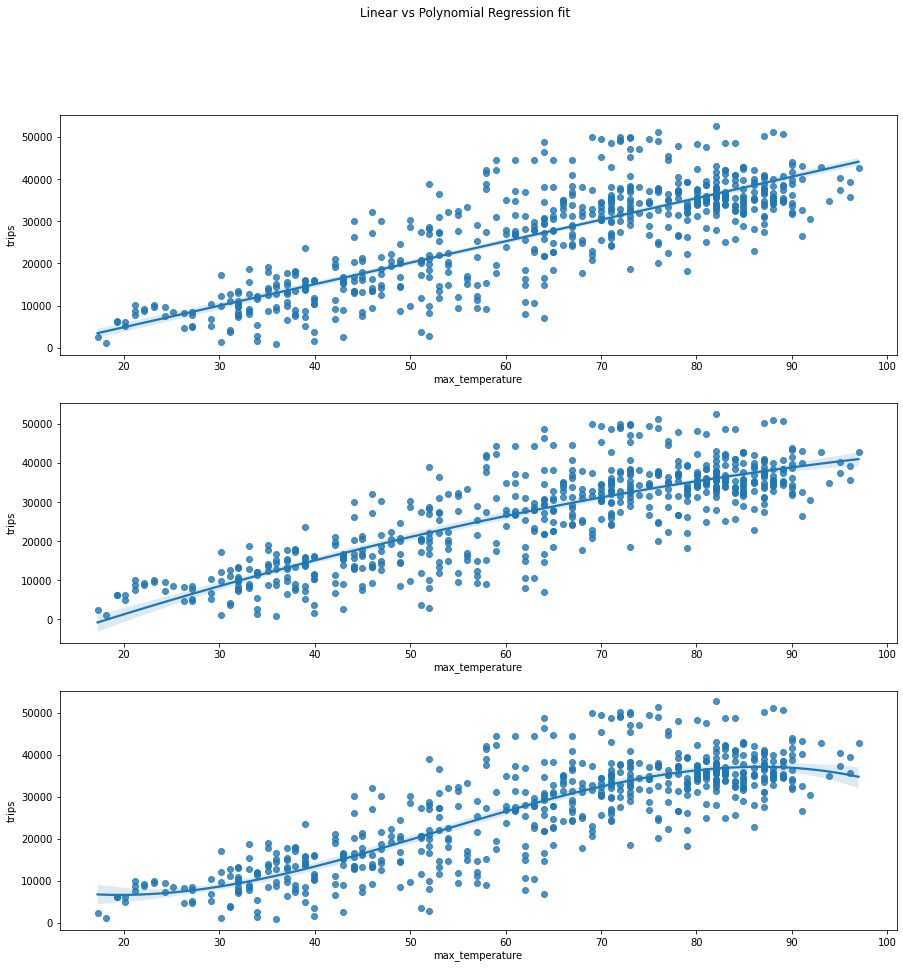

In [34]:
# plotting the different regressions side by side
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle("Linear vs Polynomial Regression fit")
sns.regplot(x='max_temperature', y='trips', data = df_weekday, order =1, ax=axes[0])
sns.regplot(x='max_temperature', y='trips', data = df_weekday, order =2, ax=axes[1])
sns.regplot(x='max_temperature', y='trips', data = df_weekday, order =3, ax=axes[2])

#obtaining the r-squared values for each regression model
t_resL = t_res_x.rsquared
t_resQ = t_res_x2.rsquared
t_resC = t_res_x3.rsquared
# printing out information about the sublots and the associated R-squared values
print("Plot Order: ")
print("Linear, R_squared: ", t_resL)
print("Quadratic, R_squared: ", t_resQ)
print("Cubic, R_squared: ", t_resC)

Here, when looking at the relationship between max temperature and trips. I chose the max temperature variable because I eliminated the min temperature variable in earlier regressions so in order to stay consistent I am using the max temperature here as well. it seems like the linear, quadratic, and cubic models are fairly evenly matched. However the R-squared value for the linear model is the highest, and is therefore the best fit for this variable

In [35]:
# fitting all the regressions with order 1, 2, and 3 for snow depth
s_mod_x = smf.ols(formula='trips ~ snow_depth + I(month) ', data=df_weekday)
s_res_x = s_mod_x.fit()
s_mod_x2 = smf.ols(formula='trips ~ snow_depth + I(month**2) ', data=df_weekday)
s_res_x2 = s_mod_x2.fit()
s_mod_x3 = smf.ols(formula='trips ~ snow_depth + I(month**3) ', data=df_weekday)
s_res_x3 = s_mod_x3.fit()

Plot Order: 
Linear, R_squared:  0.3516337339165122
Quadratic, R_squared:  0.29409811626426097
Cubic, R_squared:  0.2724292872762417


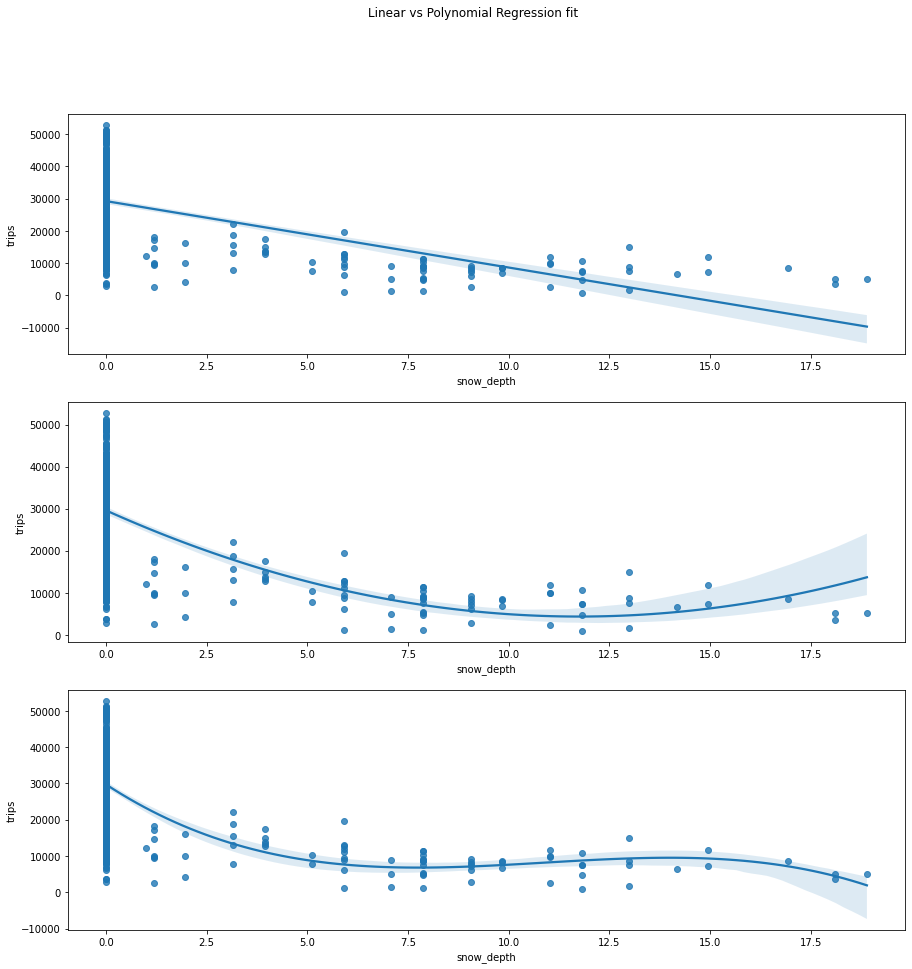

In [36]:
# plotting the different regressions side by side
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle("Linear vs Polynomial Regression fit")
sns.regplot(x='snow_depth', y='trips', data = df_weekday, order =1, ax=axes[0])
sns.regplot(x='snow_depth', y='trips', data = df_weekday, order =2, ax=axes[1])
sns.regplot(x='snow_depth', y='trips', data = df_weekday, order =3, ax=axes[2])


#obtaining the r-squared values for each regression model
s_resL = s_res_x.rsquared
s_resQ = s_res_x2.rsquared
s_resC = s_res_x3.rsquared
# printing out information about the sublots and the associated R-squared values
print("Plot Order: ")
print("Linear, R_squared: ", s_resL)
print("Quadratic, R_squared: ", s_resQ)
print("Cubic, R_squared: ", s_resC)

Here, the comparison is between snow depth and trips. I chose the snow depth variable because it has a greater impact on ridership than snowfall so the relationship should be clearer and more interesting to look at. Looking at the graphs, it looks like none of the models do a particularly great job at fitting the data. The R-squared values here are all pretty low, but the highest one is the linear regression r-squared value, so in this case the linear regression is the best fit. 

In [37]:
# fitting all the regressions with order 1, 2, and 3 for precipitation
p_mod_x = smf.ols(formula='trips ~ precipitation + I(month) ', data=df_weekday)
p_res_x = p_mod_x.fit()
p_mod_x2 = smf.ols(formula='trips ~ precipitation + I(month**2) ', data=df_weekday)
p_res_x2 = p_mod_x2.fit()
p_mod_x3 = smf.ols(formula='trips ~ precipitation + I(month**3) ', data=df_weekday)
p_res_x3 = p_mod_x3.fit()

Plot Order: 
Linear, R_squared:  0.31721623998835
Quadratic, R_squared:  0.19336775319557253
Cubic, R_squared:  0.12399675314990954


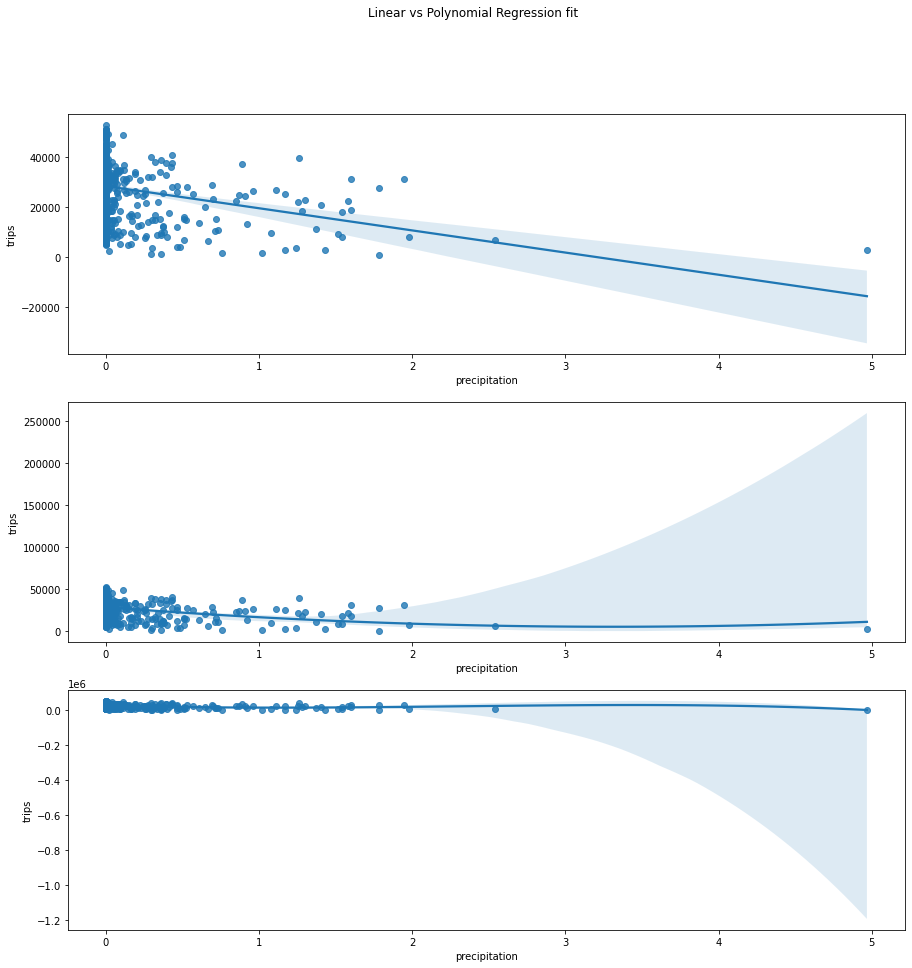

In [38]:
# plotting the different regressions side by side
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle("Linear vs Polynomial Regression fit")
sns.regplot(x='precipitation', y='trips', data = df_weekday, order =1, ax=axes[0])
sns.regplot(x='precipitation', y='trips', data = df_weekday, order =2, ax=axes[1])
sns.regplot(x='precipitation', y='trips', data = df_weekday, order =3, ax=axes[2])

#obtaining the r-squared values for each regression model
p_resL = p_res_x.rsquared
p_resQ = p_res_x2.rsquared
p_resC = p_res_x3.rsquared
# printing out information about the sublots and the associated R-squared values
print("Plot Order: ")
print("Linear, R_squared: ", p_resL)
print("Quadratic, R_squared: ", p_resQ)
print("Cubic, R_squared: ", p_resC)

Here we are looking at the relationship between precipitation and number of trips. Similar to the previous set of graphs, here we see that none of the regressions do a particualrly great job. the R-squared values here are also pretty low overall for this comparison of precipitation to ridership. However, we find that once again here the linear regression yields the best results for this variable. 

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [10pts]

Plot Order: 
Linear, R_squared:  0.7265011453640233
Quadratic, R_squared:  0.721553057530417
Cubic, R_squared:  0.7163981699583083


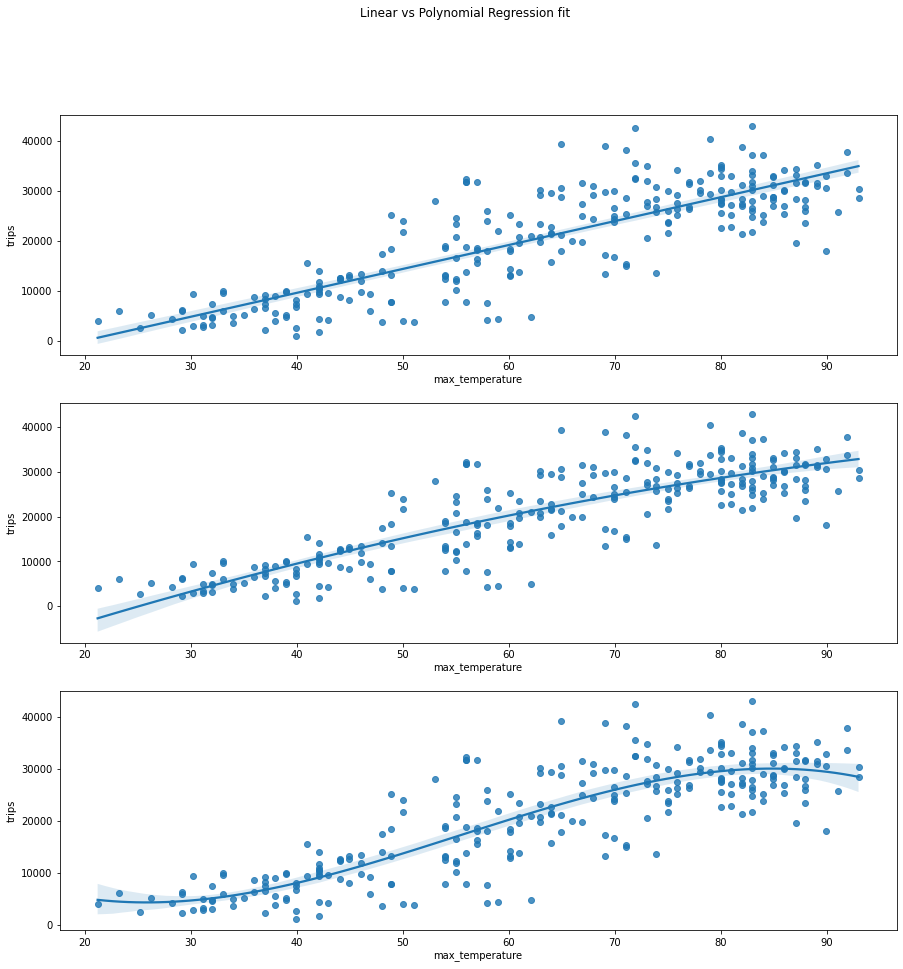

In [39]:
# fitting all the regressions with order 1, 2, and 3
t_mod_x = smf.ols(formula='trips ~ max_temperature + I(month) ', data=df_weekend)
t_res_x = t_mod_x.fit()
t_mod_x2 = smf.ols(formula='trips ~ max_temperature + I(month**2) ', data=df_weekend)
t_res_x2 = t_mod_x2.fit()
t_mod_x3 = smf.ols(formula='trips ~ max_temperature + I(month**3) ', data=df_weekend)
t_res_x3 = t_mod_x3.fit()
# plotting the different regressions side by side
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle("Linear vs Polynomial Regression fit")
sns.regplot(x='max_temperature', y='trips', data = df_weekend, order =1, ax=axes[0])
sns.regplot(x='max_temperature', y='trips', data = df_weekend, order =2, ax=axes[1])
sns.regplot(x='max_temperature', y='trips', data = df_weekend, order =3, ax=axes[2])

#obtaining the r-squared values for each regression model
t_resL = t_res_x.rsquared
t_resQ = t_res_x2.rsquared
t_resC = t_res_x3.rsquared
# printing out information about the sublots and the associated R-squared values
print("Plot Order: ")
print("Linear, R_squared: ", t_resL)
print("Quadratic, R_squared: ", t_resQ)
print("Cubic, R_squared: ", t_resC)

This result is pretty similar from the earlier result, with the Linear regression being the best at fitting the data. the biggest differnece is that there are significantly fewer data points, so the trend is less clear due to the sparse datapoints. 

Plot Order: 
Linear, R_squared:  0.23212005259112622
Quadratic, R_squared:  0.2081218801962611
Cubic, R_squared:  0.2212933011999425


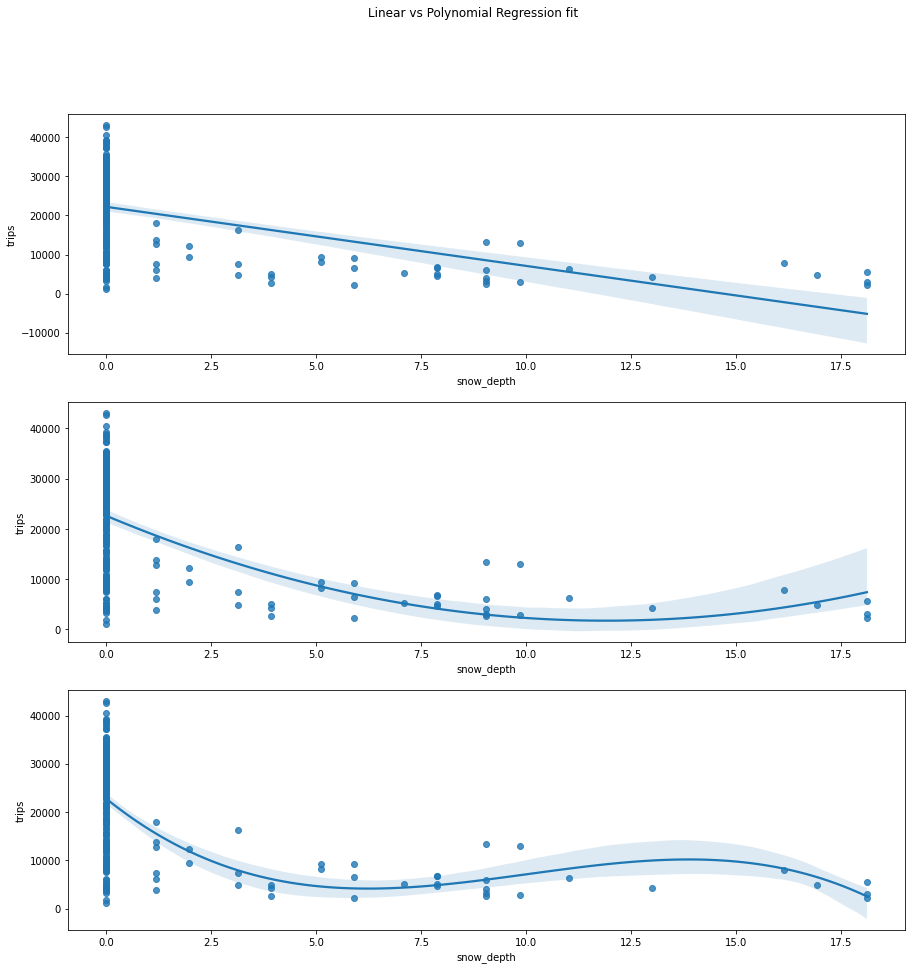

In [40]:
# fitting all the regressions with order 1, 2, and 3
s_mod_x = smf.ols(formula='trips ~ snow_depth + I(month) ', data=df_weekend)
s_res_x = s_mod_x.fit()
s_mod_x2 = smf.ols(formula='trips ~ snow_depth + I(month**2) ', data=df_weekend)
s_res_x2 = s_mod_x2.fit()
s_mod_x3 = smf.ols(formula='trips ~ snow_depth + I(month**3) ', data=df_weekend)
s_res_x3 = s_mod_x3.fit()
# plotting the different regressions side by side
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle("Linear vs Polynomial Regression fit")
sns.regplot(x='snow_depth', y='trips', data = df_weekend, order =1, ax=axes[0])
sns.regplot(x='snow_depth', y='trips', data = df_weekend, order =2, ax=axes[1])
sns.regplot(x='snow_depth', y='trips', data = df_weekend, order =3, ax=axes[2])

#obtaining the r-squared values for each regression model
s_resL = s_res_x.rsquared
s_resQ = s_res_x2.rsquared
s_resC = s_res_x3.rsquared
# printing out information about the sublots and the associated R-squared values
print("Plot Order: ")
print("Linear, R_squared: ", s_resL)
print("Quadratic, R_squared: ", s_resQ)
print("Cubic, R_squared: ", s_resC)

Again, similar to the previous comparison between snow depth and trips, with the linear regression fitting the data best out of all the options. Here there is very little data outside of zero snow depth on weekends, so it makes it near impossible to come up with a good model to fit the data.

Plot Order: 
Linear, R_squared:  0.18520333804058553
Quadratic, R_squared:  0.10678857437676537
Cubic, R_squared:  0.0827944854911109


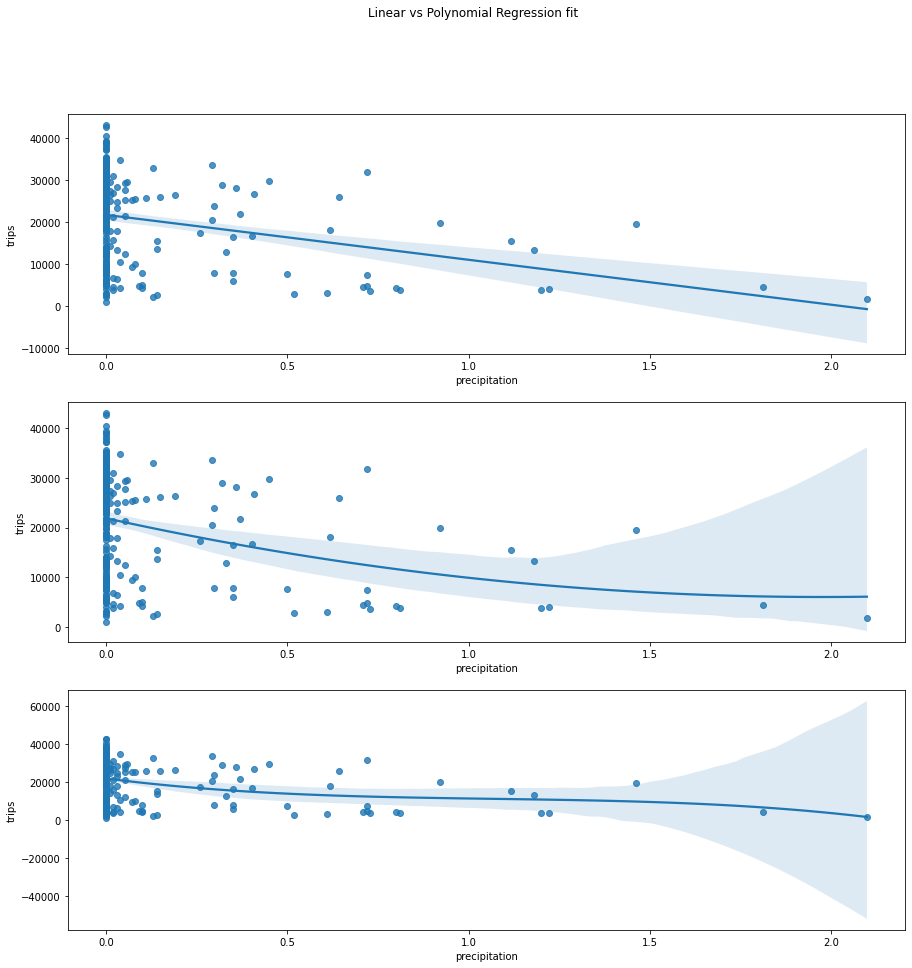

In [41]:
# fitting all the regressions with order 1, 2, and 3
p_mod_x = smf.ols(formula='trips ~ precipitation + I(month) ', data=df_weekend)
p_res_x = p_mod_x.fit()
p_mod_x2 = smf.ols(formula='trips ~ precipitation + I(month**2) ', data=df_weekend)
p_res_x2 = p_mod_x2.fit()
p_mod_x3 = smf.ols(formula='trips ~ precipitation + I(month**3) ', data=df_weekend)
p_res_x3 = p_mod_x3.fit()
# plotting the different regressions side by side
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle("Linear vs Polynomial Regression fit")
sns.regplot(x='precipitation', y='trips', data = df_weekend, order =1, ax=axes[0])
sns.regplot(x='precipitation', y='trips', data = df_weekend, order =2, ax=axes[1])
sns.regplot(x='precipitation', y='trips', data = df_weekend, order =3, ax=axes[2])

#obtaining the r-squared values for each regression model
p_resL = p_res_x.rsquared
p_resQ = p_res_x2.rsquared
p_resC = p_res_x3.rsquared
# printing out information about the sublots and the associated R-squared values
print("Plot Order: ")
print("Linear, R_squared: ", p_resL)
print("Quadratic, R_squared: ", p_resQ)
print("Cubic, R_squared: ", p_resC)

Again, the results appear to be similar between the two comparisons of precipitation and trips, with linear yielding the best results. Similarly to the snow depth, there are so few data points on weekends for precipitation much over zero that it makes it very difficult for any kind of regression to fit since there is no real pattern to be found in such a sparse set of data. 